In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T

X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T

In [4]:
print("shape of x train\t",X_train.shape)
print("shape of y train\t",Y_train.shape)
print("shape of x test\t",X_test.shape)
print("shape of y test\t",Y_test.shape)

shape of x train	 (784, 1000)
shape of y train	 (10, 1000)
shape of x test	 (784, 350)
shape of y test	 (10, 350)


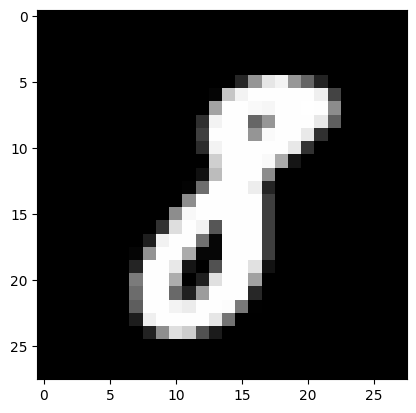

In [7]:
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
plt.show()

In [141]:
#implement

In [16]:
#activation function
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX,axis=0)

In [17]:
#derivatives
def derivative_tanh(x):
    return 1-np.power(np.tanh(x),2)

def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)

In [18]:

#initialize parameters
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    return parameters


In [19]:
#forward propagation
def forward_propagation(x,parameters):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,x)+b1
    a1=tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache={
        'z1':z1,
        'a1':a1,
        'z2':z2,
        'a2':a2
    }
    return forward_cache


In [20]:
#costfunction
def cost_function(a2,y):
    m=y.shape[1]
    
    cost=-(1/m)*np.sum(y*np.log(a2))
    #cost=-(1/m)*np.sum(y*np.log(a2,0),1) 
    return cost

In [21]:
#backward propagation
def backward_propagation(x,y,parameters,forward_cache):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    a1=forward_cache['a1']
    a2=forward_cache['a2']
    
    m=x.shape[1]
    
    dz2=(a2-y)
    dw2=(1/m)*(np.dot(dz2,a1.T))
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=(1/m)*np.dot(w2.T,dz2)*derivative_tanh(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    gradients={
        'dw1':dw1,
        'db1':db1,
        'dw2':dw2,
        'db2':db2,
    }
    return gradients

    
    

In [22]:
def update_parameters(parameters,gradients,learning_rate):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    
    parameters={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    return parameters

    

In [23]:
#complete model
def model(x,y,n_h,learning_rate,iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_propagation(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list
        

In [24]:
iterations=100
iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.3236319788094324
Cost after 10 iterations is : 1.1790135308177403
Cost after 20 iterations is : 0.8278237324770343
Cost after 30 iterations is : 0.6618998118130126
Cost after 40 iterations is : 0.5620052788550338
Cost after 50 iterations is : 0.4931967938026351
Cost after 60 iterations is : 0.44178766823977256
Cost after 70 iterations is : 0.4012860704289943
Cost after 80 iterations is : 0.36818318009048984
Cost after 90 iterations is : 0.3403957658626048


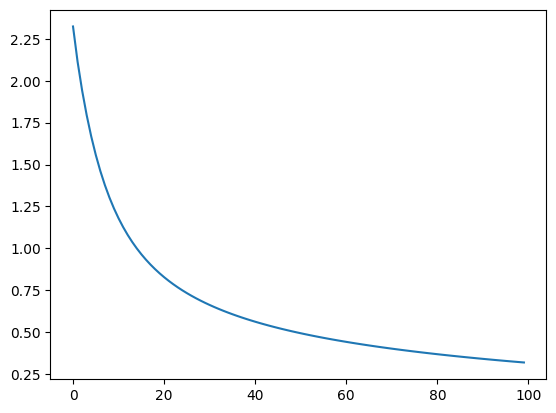

In [25]:
t=np.arange(0,iterations)
plt.plot(t,Cost_list)
plt.show()

In [26]:
def accuracy(inp,labels,Parameters):
    forward_cache=forward_propagation(inp,Parameters)
    a_out=forward_cache['a2']

    a_out=np.argmax(a_out,0)

    y_out=np.argmax(labels,0)


    acc=np.mean(a_out==y_out)*100
    return acc

In [27]:
print("Accuracy of trained dataset is:",accuracy(X_train,Y_train,Parameters),"%")
print("Accuracy of tested dataset is:",round(accuracy(X_test,Y_test,Parameters)),"%")

Accuracy of trained dataset is: 95.8 %
Accuracy of tested dataset is: 85 %


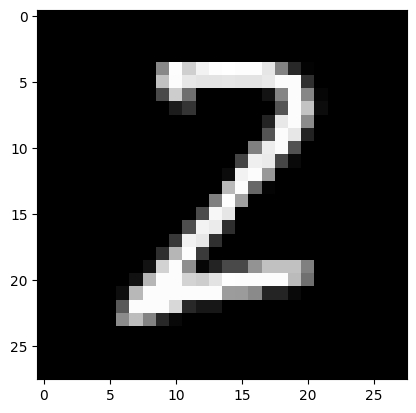

Our model says it is : 2


In [28]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])